### Урок 3. Классификация. Логистическая регрессия.

In [278]:
import numpy as np
import matplotlib.pyplot as plt

In [279]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [280]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [281]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [282]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [283]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [284]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [285]:
# def calc_logloss(y, y_pred):
#     err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
#     err = np.sum(err)
#     return err

In [286]:
def calc_logloss(y, y_pred):
    y_pred_mod = np.where(y_pred == 1, y_pred - 1e-09, np.where(y_pred == 0, y_pred + 1e-09, y_pred))
    err = - np.mean(y * np.log(y_pred_mod) + (1.0 - y) * np.log(1.0 - y_pred_mod))
    err = np.sum(err)
    return err

In [287]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [288]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [289]:
z = np.linspace(-10, 10, 101)

In [290]:
probabilities = sigmoid(z)

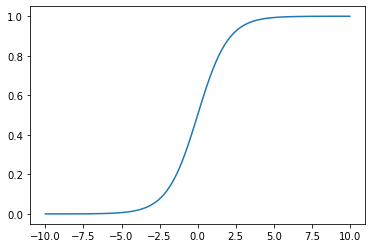

In [291]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [292]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [293]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


## Д/з

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [294]:
def calc_logloss_mod(y, y_pred):
    y_pred_mod = np.where(y_pred == 1, y_pred - 1e-07, np.where(y_pred == 0, y_pred + 1e-07, y_pred))
    err = - np.mean(y * np.log(y_pred_mod) + (1.0 - y) * np.log(1.0 - y_pred_mod))
    err = np.sum(err)
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [380]:
def eval_model(X, y, alpha=1e-4, tol=1e-4, max_iterations=10000):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    min_err = 999999999999
    for i in range(1, max_iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_mod(y, y_pred)
        if np.abs(min_err - err) > tol:  
            min_err = err
        else:
            W -= alpha * (1/n * np.dot((y_pred - y), X.T))
            break
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    return W, i, min_err

In [393]:
alpha_list = [1-0.05*i for i in range(20)]
tol_list = [10**i for i in range(-2, -7, -1)]

min_err = 999999999999
for tol in tol_list:
    for alpha in alpha_list:
#         print(alpha, tol, eval_model(X_st, y, alpha=alpha, tol=tol, max_iterations=10000))
        W, i, err = eval_model(X_st, y, alpha=alpha, tol=tol, max_iterations=1000)
        if min_err > err:
            min_err = err
            res_str = f'Минимальное значение ошибки - {min_err}, при alpha - {alpha} и tol - {tol}'
print(res_str)

Минимальное значение ошибки - 0.2317134155907108, при alpha - 1.0 и tol - 1e-05


Применим полученные опттимальные значения.

In [394]:
W, i, min_err = eval_model(X_st, y, alpha = 1, tol = 1e-05)

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [395]:
def calc_pred_proba(w, x): 
    pred_proba = sigmoid(np.dot(w, x))
    return pred_proba

In [396]:
y_pred_prob = calc_pred_proba(W, X_st)
y_pred_prob

array([3.83512898e-01, 4.27526106e-02, 9.99998932e-01, 5.74228331e-06,
       8.76747585e-01, 1.35098051e-01, 9.99999912e-01, 3.99854993e-02,
       5.45827947e-01, 9.99971266e-01])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [397]:
def calc_pred(w, x, lim = 0.5):
    pred_proba = sigmoid(np.dot(w, x))
    pred = []
    for el in pred_proba:
        if el > lim:
            pred.append(1)
        else:
            pred.append(0)
    return np.array(pred)

In [398]:
y_pred=calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [399]:
import pandas as pd
result = pd.DataFrame({
    "y_true": y,
    "y_pred": y_pred
},dtype=int)
# result

tp = result.loc[(result['y_true'] == 1) & (result['y_pred'] == 1)].shape[0]
tn = result.loc[(result['y_true'] == 0) & (result['y_pred'] == 0)].shape[0]
fp = result.loc[(result['y_true'] == 0) & (result['y_pred'] == 1)].shape[0]
fn = result.loc[(result['y_true'] == 1) & (result['y_pred'] == 0)].shape[0]

In [400]:
my_accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f'Accuracy: {my_accuracy}')

Accuracy: 1.0


In [401]:
my_confusion_matrix = pd.DataFrame({
    "": ['a(x) = 1', 'a(x) = 0'],
    "y = 1": [tp, fn],
    "y = 0": [fp, tn]
}).set_index('')
print(f'Матрица ошибок:\n\n{my_confusion_matrix}')

Матрица ошибок:

          y = 1  y = 0
                      
a(x) = 1      5      0
a(x) = 0      0      5


In [402]:
my_precision = tp / (tp + fp)
print(f'Precision: {my_precision}')

Precision: 1.0


In [403]:
my_recall = tp / (tp + fn)
print(f'Recall: {my_recall}')

Recall: 1.0


In [404]:
my_f1 = (2 * my_precision * my_recall) / (my_precision + my_recall)
print(f'F1: {my_f1}')

F1: 1.0


6. Могла ли модель переобучиться? Почему?

Логистическая регрессия склонна к переобучению из-за использования сигмоиды для преобразования в вероятность предсказаний линейной модели. Поскольку сигмоида не имеет максимума и минимума, а только асимптоты в 0 и 1, градиентный спуск не может достичь оптимального решения, доводя веса до все более экстремальных значений, пытаясь достичь нулевых потерь. Поэтому в качестве способа регуляризации можно использовать раннюю остановку работы модели, а так же L1 и L2 регуляризацию.